### Packages

In [22]:
import pandas as pd
import seaborn as sns

In [15]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
#cleaning the text
#cleaning text is basically removing stop words, commas, full stops, lemmatizing or stemming it etc.
import re #for regular expression
from nltk.corpus import stopwords #responsible for removing stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer #responsible for doing lemmatizing

In [45]:
from sklearn.feature_extraction.text import CountVectorizer #responsible for creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer #responsible to do the tf-idf mechanism

### Dataset Preprocessing

In [24]:
df = pd.read_csv('updated_inkognito_trainingset.csv')

In [25]:
df.head()

,Unnamed: 0,text,Status
0,0,@115712 I understand. I would like to assist y...,False
1,1,@sprintcare and how do you propose we do that,False
2,2,@sprintcare I have sent several private messag...,False
3,3,@115712 Please send us a Private Message so th...,False
4,4,@sprintcare I did.,False


In [26]:
df.columns

Index(['Unnamed: 0', 'text', 'Status'], dtype='object')

In [27]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
df.head()

,text,Status
0,@115712 I understand. I would like to assist y...,False
1,@sprintcare and how do you propose we do that,False
2,@sprintcare I have sent several private messag...,False
3,@115712 Please send us a Private Message so th...,False
4,@sprintcare I did.,False


<AxesSubplot:xlabel='Status', ylabel='count'>

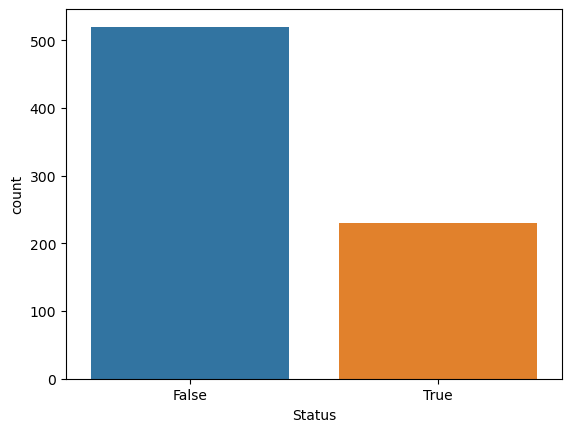

In [29]:
sns.countplot(x=df['Status'])

* We have to do the class imbalance part before doing the classification

In [30]:
sns.countplot(x=df['Status'])

In [31]:
df.head()

,text,Status_False,Status_True
0,@115712 I understand. I would like to assist y...,1,0
1,@sprintcare and how do you propose we do that,1,0
2,@sprintcare I have sent several private messag...,1,0
3,@115712 Please send us a Private Message so th...,1,0
4,@sprintcare I did.,1,0


In [32]:
df.drop('Status_False',axis=1,inplace=True)

In [33]:
df = df.rename(columns={'Status_True': 'Status'})

In [34]:
df.head()
# False -> 0
# True -> 1

,text,Status
0,@115712 I understand. I would like to assist y...,0
1,@sprintcare and how do you propose we do that,0
2,@sprintcare I have sent several private messag...,0
3,@115712 Please send us a Private Message so th...,0
4,@sprintcare I did.,0


### Data Cleaning for NLP approach

In [35]:
wordnet = WordNetLemmatizer() #this is responsible for doing the lemmatizing functionality
corpus = [] #after cleaning the text we are going to store perticular sentence in this list

In [36]:
for i in range(0,len(df)): #go through each row in dataset
    review = re.sub('[^a-zA-Z]',' ',df['text'][i]) #apart from a-z and A-Z we remove everything and replace them by spaces
    review = review.lower() #lower all the words then we don't have any duplicates
    review = review.split() #split each and every word to help to lemmatizing
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')] #lemmatzing and remove stop words
    #first find the word is stop word or not. if it is not a lemmatizing word , then move it to the- lemmatizing purpose.
    #from lemmatizing we can get base form of the word
    review = ' '.join(review) #join every lemmatized word
    corpus.append(review) #append to empty list


In [37]:
corpus #lemmatized sentences

['understand would like assist would need get private secured link assist',
 'sprintcare propose',
 'sprintcare sent several private message one responding usual',
 'please send u private message assist click message top profile',
 'sprintcare',
 'please send u private message gain detail account',
 'sprintcare worst customer service',
 'saddening hear please shoot u dm look kc',
 'sprintcare gonna magically change connectivity whole family',
 'understand concern like please send u direct message assist aa',
 'sprintcare since signed since day',
 'h definitely like work long experiencing issue aa',
 'lie great connection bar lte still load something smh',
 'please send private message send link access account fr',
 'whenever contact customer support tell shortcode enabled account never year tried http co g rtnxpk',
 'information incorrect jk',
 'ask spectrum would like email copy one since spectrum updating training',
 'department part corporate office particular area gone format unawa

### Building Bag of Words Vectors

In [46]:
cv = CountVectorizer() #create an object for bag of words vectors
X_bow = cv.fit_transform(corpus).toarray() #convert input data to an array

In [47]:
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
X_bow.shape
#there are 2200 words that are taken after lemmatizing
#there are 750 senetences

(750, 2200)

### Building TF-IDF Vectors

In [48]:
cv = TfidfVectorizer() #create an object for TF-IDF
X_tfidf = cv.fit_transform(corpus).toarray() #transform the output from list to array

In [49]:
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
X_tfidf.shape
#there are 2200 words that are taken after lemmatizing
#there are 750 senetences

(750, 2200)